In [0]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Download data and show it

In [0]:
df = pd.read_csv('/content/lab7_data (1).csv', sep = '\t', index_col = False)
df = df.iloc[:, 1:]
df

,contract_id,cnt_blocks_1m,cnt_blocks_2m,cnt_blocks_3m,cnt_blocks_2m_sum,cnt_blocks_3m_sum,ratio_cnt_blocks_2m,ratio_cnt_blocks_3m,avg_block_3m,last_block,ratio_last_block_to_3m,age,contract_duration,cnt_active_services_now,cnt_active_services,cnt_canceled_services,avg_service_time,last_change_time,avg_service,cnt_contracts_in_area,cnt_active_contarcts_in_area,cnt_broken_contracts_in_area,credit_3m,credit_2m,credit_1m,cnt_transactions_3m,cnt_transactions_2m,cnt_transactions_1m,transaction_period_3m,transaction_period_2m,transaction_period_1m,avg_transaction_3m,avg_transaction_2m,avg_transaction_1m,last_transaction,ratio_last_transaction_to_3m,ratio_last_transaction_to_2m,ratio_last_transaction_to_1m,last_transaction_time,ratio_last_transaction_time_to_1m,...,cnt_types_of_transaction,cnt_tariff_plan,last_tariff_plan_change,tariff_payment_now,tariff_payment_before,diff_in_tariff_payments,avg_tariff_change_time,cnt_equip,traffic_activity_1m,open_sessions_1m,traffic_activity_2m,open_sessions_2m,traffic_activity_3m,open_sessions_3m,traffic_activity_1w,open_sessions_1w,traffic_activity_2w,open_sessions_2w,traffic_activity_3w,open_sessions_1m.1,traffic_activity_4w,open_sessions_4w,ratio_traffic_1m_to_3m,ratio_traffic_1m_to_2m,avg_daily_traffic_1m,avg_daily_traffic_2m,avg_daily_traffic_3m,avg_daily_traffic_1w,avg_daily_traffic_2w,avg_daily_traffic_3w,avg_daily_traffic_4w,avg_traffic_per_session_1m,avg_traffic_per_session_2m,avg_traffic_per_session_3m,avg_traffic_per_session_1w,avg_traffic_per_session_2w,avg_traffic_per_session_3w,avg_traffic_per_session_4w,ARPU,churn
0,4965,0,3,1,3,4,"0,7779773547",0,521,"392,600029743","2,7411733379",63,1715,0,0,2,2438,634,0,62,9,1,"11,1816888285","4,3425940072","0,3737018141",0,0,6,8,64,65,0,0,"12,7711171399",0,"4,0962422891",0,"0,3740728793",0,"0,7176802519",...,2,0,2802,"0,1477218361",0,"0,1477218361",0,1,"55,1938186202",425897,"112,863115159",944377,"10,7324022977",94749,0,0,"20,5784488883",157221,"3,6923348263",26231,"12,8077270448",100708,1,1,"1,3226445405","2,0375077998","1,2398307657",0,0,0,0,"0,0001816397","0,0018004965",0,"4,58419011335e-05","0,0016659244",0,0,890,1
1,4974,0,6,0,6,6,1,"0,4156129098",474,"1148,81511032","2,3318567787",47,1050,0,3,0,0,621,0,130,73,5,0,"0,9627378295","0,0552357898",8,0,3,3,5,35,"2,9035101137","1,0036416494",0,"4,6943532877","3,5440347317","1,4649731771",0,20,"0,8530995198",...,0,0,204,0,"3,9321650055","-3,9321650055","390,275152592",4,0,0,0,0,0,0,"4,6058961516",41704,0,0,"1,7585262944",12492,"2,4016634876",18884,0,0,"0,1302455994","4,4827711878","6,5350655597","1,0178284573",0,"0,8188339631","4,3181018369","0,0003116436","0,0003189455","0,000200679","0,0001650431","0,0023170273",0,"0,0011176568",538,1
2,2018,0,0,0,0,0,"0,7447090827","0,4366654668",0,0,0,66,1279,1,0,0,1997,0,"0,0178586026",32,25,2,"16,6941414657","4,1530927778","0,2276475345",0,6,0,0,106,2,"1,8146381918","0,9815605267","8,1569893166",0,"1,8984003028","6,2013063128","0,581330511",45,"3,9300028796",...,0,3,575,"0,2024328216","0,2111524119","-0,0087195903","150,923318435",3,"58,3656644167",486686,0,0,"175,148791073",1499615,0,0,"13,6858477696",113307,"5,4062433572",45374,"8,7668525651",73580,"0,0677438103","0,4168548721","1,9687834032","0,6168995473",0,"1,5811970874","1,06812641","2,2273355244",0,"0,0001814852","1,00306714884e-05","0,0002617737",0,"9,20118316613e-05",0,0,1340,0
3,2628,1,0,0,1,1,0,"0,7024947818",166,"357,590606298","1,0855322039",29,269,0,5,4,0,1314,"1,3040236253",68,1,0,"7,1677446433","7,7844769286","1,8099180608",0,12,3,78,24,121,"1,7805740569",0,0,0,"3,3894454761",0,"1,2988378412",45,0,...,1,5,0,"2,3747449223","0,0667609237","2,3079839987","346,500326635",8,0,0,"75,4267641785",631130,"51,2239111219",452221,"2,811313623",25455,"19,0430150322",145490,"15,9498530374",113310,0,0,"0,5114550491",0,0,"0,7639668704",0,0,0,0,0,0,0,"8,25253828637e-05",0,"0,0020704039","0,0005924582",0,"153,688501747",1
4,3336,0,0,0,0,0,0,1,780,0,0,28,3457,0,3,0,1101,447,"1,1393204754",322,266,15,"2,920631

Replace , and change to type float

In [0]:
df = df.replace(to_replace= ',', value= '.', regex=True)
df = df.astype(float)

Split data

In [0]:
X = df.iloc[:, 0: 82]
y = df['churn']
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
2679    0.0
2680    0.0
2681    0.0
2682    0.0
2683    1.0
Name: churn, Length: 2684, dtype: float64

Split data


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

parameters svm for grid search

In [0]:
svm_parameters = [{'kernel':['rbf'], 'C':[0.1, 1, 10], 'gamma':[0.01, 0.1, 1]}]

grid search svm

In [0]:
svc = svm.SVC(gamma='scale', probability=True)
clf1 = GridSearchCV(svc, svm_parameters, cv=5, scoring='roc_auc')
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)
print (clf1.best_score_)
print(clf1.best_params_)

0.5
{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


parameters knn for grid search 

In [0]:
knn_parametrs = [{'n_neighbors':[3, 4, 5, 6], 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}]

grid search knn

In [0]:
knn = KNeighborsClassifier()
clf2 = GridSearchCV(knn, knn_parametrs, cv=5, scoring='roc_auc')
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)
print (clf2.best_score_)
print(clf2.best_params_)

0.5310886069787534
{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}


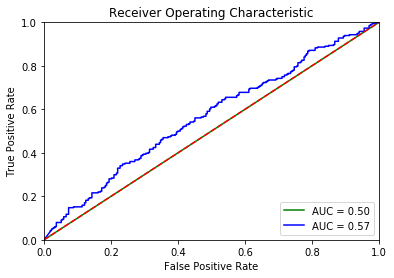

In [0]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

probs1 = clf1.predict_proba(X_test)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

# method I: plt
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1, color = 'green')
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()